# **Sales Performance Analysis**

## Project Overview
This project analyzes retail sales data to understand sales trends, category-wise performance, regional profitability, and loss-making products. The goal is to generate actionable insights that support better business decision-making.


## Project Objective

The objective of this project is to analyze retail sales data to identify sales trends, evaluate product category and regional performance, and uncover loss-making products. The analysis aims to provide data-driven insights to improve profitability and optimize business strategy.


## Business Questions

- Which product categories generate the highest sales and profit?
- Which regions are most profitable?
- How do sales change over time?
- Which products are consistently making losses?


#Importing Libraries

In [15]:
# Importing necessary libraries need for import pandas as pd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
#Warning module
import warnings
warnings.filterwarnings('ignore')

In [13]:
# mount the google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Uploaded Sales dataset

In [16]:
# Upload dataset and display first five rows

df = pd.read_csv('/content/Sample - Superstore.csv', encoding='latin1')
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [17]:
# TO check total number of rows and columns

print("Total number of rows is:",df.shape[0])
print("Total number of column is:",df.shape[1])

Total number of rows is: 9994
Total number of column is: 21


In [18]:
# To check the information
print("Information of dataset:")
df.info()


Information of dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non-null

In [19]:
print("Data Types:")
df.dtypes

Data Types:


,0
Row ID,int64
Order ID,object
Order Date,object
Ship Date,object
Ship Mode,object
Customer ID,object
Customer Name,object
Segment,object
Country,object
City,object


In [20]:
# Descriptive Statistics

print("Descriptive Statistics:")
df.describe()

Descriptive Statistics:


,Row ID,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,4997.500000,55190.379428,229.858001,3.789574,0.156203,28.656896
std,2885.163629,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1.000000,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,2499.250000,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,4997.500000,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,7495.750000,90008.000000,209.940000,5.000000,0.200000,29.364000
max,9994.000000,99301.000000,22638.480000,14.000000,0.800000,8399.976000


## Data Cleaning

In this step, we check for missing values, duplicate records, and correct data types to ensure data quality before analysis.


In [21]:
# Checking for missing values
df.isnull().sum()

,0
Row ID,0
Order ID,0
Order Date,0
Ship Date,0
Ship Mode,0
Customer ID,0
Customer Name,0
Segment,0
Country,0
City,0


In [22]:
# Checking for duplicates
df.duplicated().sum()

np.int64(0)

In [23]:
# Droping duplicates ,if any
df = df.drop_duplicates()

## Data Handling

Here we convert data types

In [24]:
# Coverting object into datetime type
df['Order Date'] = pd.to_datetime(df['Order Date'])
df['Month'] = df['Order Date'].dt.month
df['Year'] = df['Order Date'].dt.year


In [ ]:
df.dtypes

In [25]:
# Coverting object into datetime type
df['Ship Date'] = pd.to_datetime(df['Ship Date'])
df['Month'] = df['Ship Date'].dt.month
df['Year'] = df['Ship Date'].dt.year

In [26]:
df.dtypes

,0
Row ID,int64
Order ID,object
Order Date,datetime64[ns]
Ship Date,datetime64[ns]
Ship Mode,object
Customer ID,object
Customer Name,object
Segment,object
Country,object
City,object


## Category-wise Sales Analysis


In [27]:
df.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit', 'Month',
       'Year'],
      dtype='object')

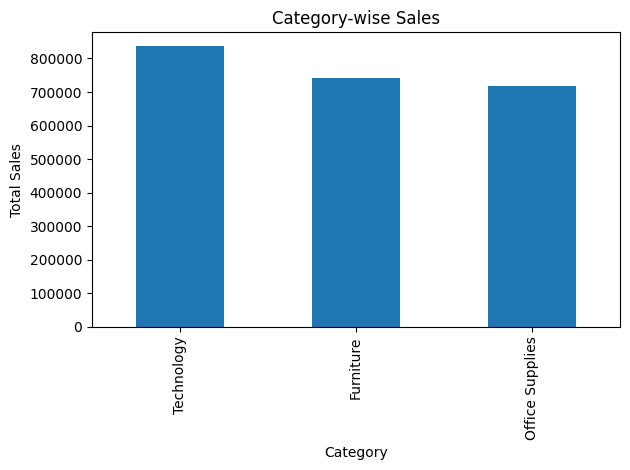

In [28]:
category_sale = df.groupby('Category')['Sales'].sum().sort_values(ascending=False)

category_sale.plot(kind='bar')
plt.title('Category-wise Sales')
plt.xlabel('Category')
plt.ylabel('Total Sales')
plt.tight_layout()
plt.show()

## Region-wise Profit Analysis


In [ ]:
df.columns

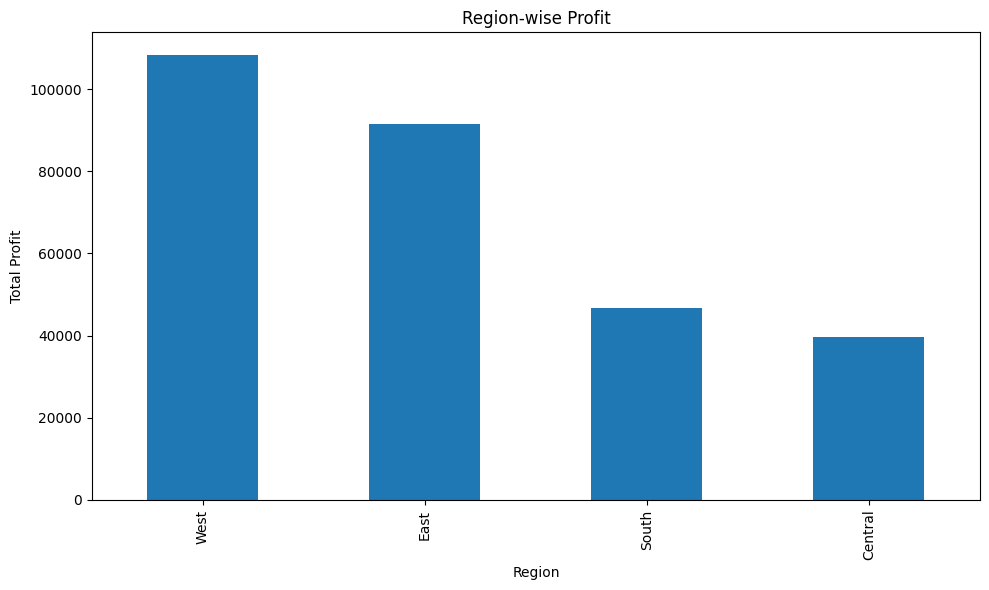

In [29]:
region_profit = df.groupby('Region')['Profit'].sum().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
region_profit.plot(kind='bar')
plt.title('Region-wise Profit')
plt.xlabel('Region')
plt.ylabel('Total Profit')
plt.tight_layout()
plt.show()

## Monthly Sales Trend


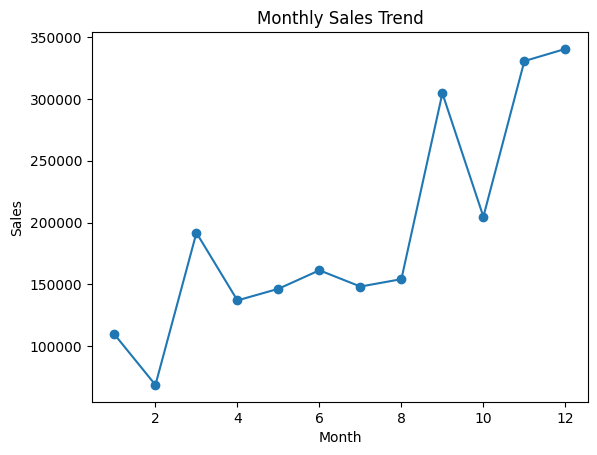

In [30]:
monthly_sales = df.groupby('Month')['Sales'].sum()

monthly_sales.plot(kind='line', marker='o')
plt.title('Monthly Sales Trend')
plt.xlabel('Month')
plt.ylabel('Sales')
plt.show()


## Loss-Making Products


In [31]:
loss_products = df[df['Profit'] < 0].sort_values('Profit').head(10)
loss_products[['Sub-Category', 'Sales', 'Profit']]


,Sub-Category,Sales,Profit
7772,Machines,4499.985,-6599.9780
683,Machines,7999.980,-3839.9904
9774,Binders,2177.584,-3701.8928
3011,Machines,2549.985,-3399.9800
4991,Binders,1889.990,-2929.4845
3151,Machines,1799.994,-2639.9912
5310,Binders,1525.188,-2287.7820
9639,Tables,4297.644,-1862.3124
1199,Binders,1088.792,-1850.9464
2697,Machines,22638.480,-1811.0784


## Profit Margin


In [32]:
df['Profit_Margin'] = df['Profit'] / df['Sales']
df[['Sales', 'Profit', 'Profit_Margin']].head()

,Sales,Profit,Profit_Margin
0,261.9600,41.9136,0.1600
1,731.9400,219.5820,0.3000
2,14.6200,6.8714,0.4700
3,957.5775,-383.0310,-0.4000
4,22.3680,2.5164,0.1125


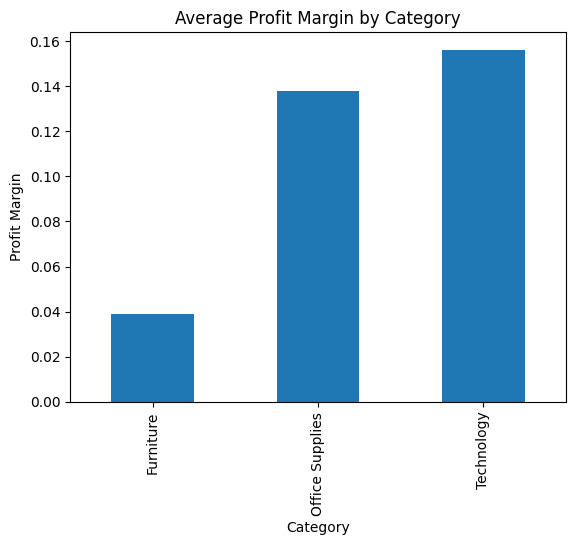

In [33]:
margin_category = df.groupby('Category')['Profit_Margin'].mean()

margin_category.plot(kind='bar')
plt.title('Average Profit Margin by Category')
plt.ylabel('Profit Margin')
plt.show()


## Top-bottom sub categories

In [34]:
subcat_profit = df.groupby('Sub-Category')['Profit'].sum().sort_values()
subcat_profit.head(5)   # Worst


,Profit
Sub-Category,
Tables,-17725.4811
Bookcases,-3472.5560
Supplies,-1189.0995
Fasteners,949.5182
Machines,3384.7569


In [ ]:
subcat_profit.tail(5)   # Best

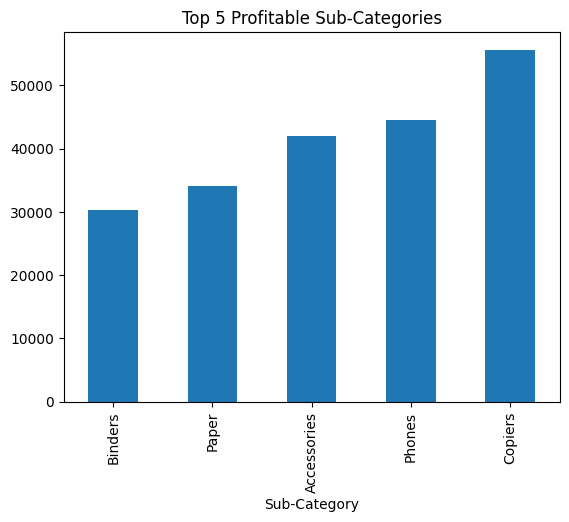

In [35]:
subcat_profit.tail(5).plot(kind='bar')
plt.title('Top 5 Profitable Sub-Categories')
plt.show()


# Sale Vs Profit Relationship

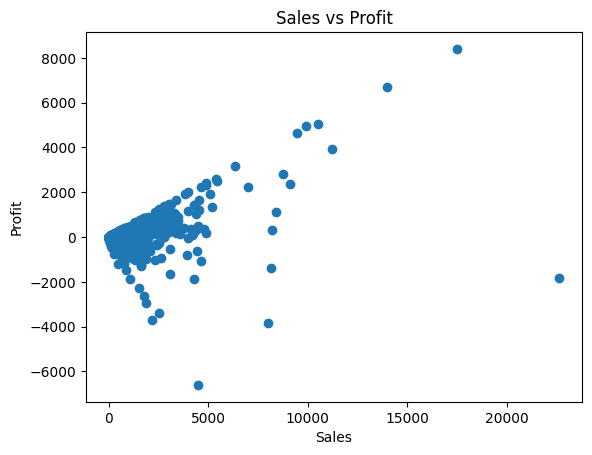

In [36]:
plt.scatter(df['Sales'], df['Profit'])
plt.xlabel('Sales')
plt.ylabel('Profit')
plt.title('Sales vs Profit')
plt.show()


## Yearly Sales Trend

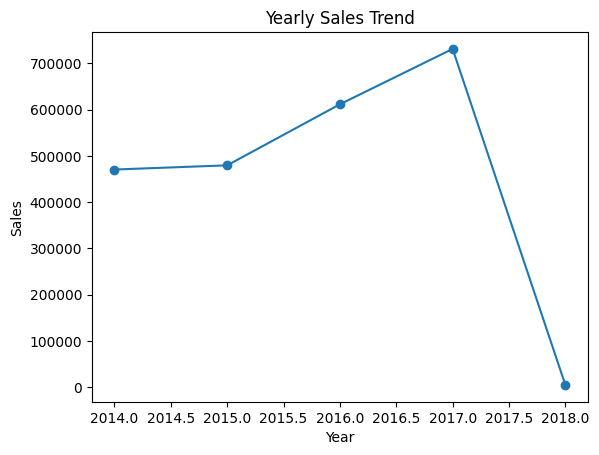

In [37]:
yearly_sales = df.groupby('Year')['Sales'].sum()

yearly_sales.plot(kind='line', marker='o')
plt.title('Yearly Sales Trend')
plt.xlabel('Year')
plt.ylabel('Sales')
plt.show()


## Region and Category Combination Analysis

In [38]:
pivot_region_category = pd.pivot_table(
    df,
    values='Sales',
    index='Region',
    columns='Category',
    aggfunc='sum'
)

pivot_region_category


Category,Furniture,Office Supplies,Technology
Region,,,
Central,163797.1638,167026.415,170416.312
East,208291.2040,205516.055,264973.981
South,117298.6840,125651.313,148771.908
West,252612.7435,220853.249,251991.832


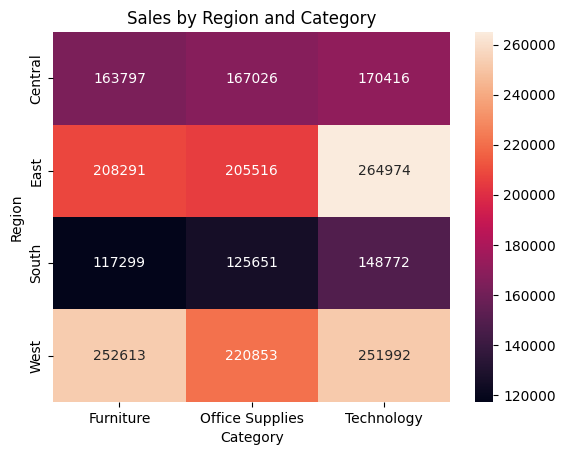

In [39]:
sns.heatmap(pivot_region_category, annot=True, fmt='.0f')
plt.title('Sales by Region and Category')
plt.show()


## Simple KPI Calculation

In [40]:
total_sales = df['Sales'].sum()
total_profit = df['Profit'].sum()
avg_order_value = df['Sales'].mean()

total_sales, total_profit, avg_order_value


(np.float64(2297200.8603000003),
 np.float64(286397.0217),
 np.float64(229.85800083049833))

## Key Insights

- Technology category generates the highest profit.
- Certain sub-categories consistently make losses.
- Sales show seasonal trends across months.
- Some regions perform better despite lower sales volume.


## Conclusion & Recommendations

- Focus on high-profit categories for growth.
- Review pricing or cost strategy for loss-making products.
- Strengthen presence in high-performing regions.
- Use seasonal trends to plan inventory and promotions.


In [41]:
df.to_csv('Cleaned_Superstore.csv', index=False)
